In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import pandas as pd
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_data(path):
    def func(x):
        """Extracts input size from file name"""
        v = x.split(".")[-2].split("-")[-1]
        return int(v)
    
    data = {}

    for filename in glob.iglob(path):
        # extract name
        name = filename.replace("../", "").split(".")[0]

        # read file
        df = pd.read_csv(filename, index_col="Filename")

        # make column names lower-case and remove spaces
        df = df.rename(columns=lambda x: x.strip().lower())    

        # add encoding and message (tyencodepe) columns
        df['format'] = np.where(df.index.str.endswith(".ber"), 'BER', 'XML')
        df['message'] = np.where(df.index.str.contains("data-request"), 'data-request', 'data-response')

        # drop total
        df = df.drop(axis=1, columns=['total'])

        # rename average to the name of this data set
        df = df.rename(columns={"average": name})

        # create input-size parameter
        df['input-size'] = df.index.map(func)

        # save df
        data[name] = df
    
    return data

data = load_data("../*.csv")

# Encoding

In [4]:
e_c_xml = data["encode-c"][data["encode-c"]["format"] == 'XML'].sort_values(
    by='input-size'
).drop(['bytes', 'format'], axis=1
      ).rename(columns={'encode-c': 'encode-c-xml'})

e_py_c = pd.merge(data["encode-python"], data["encode-c"], how='inner').drop(['bytes', 'format'], axis=1)
e_py_c_xml = pd.merge(e_py_c, e_c_xml, on=['message', 'input-size'], how='inner')
encoding = pd.merge(e_py_c_xml, data["encode-java"], on=['message', 'input-size'],
                    how='inner').drop(['format', 'bytes'], axis=1)

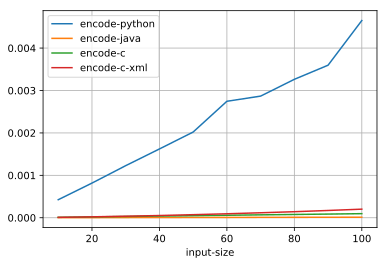

In [5]:
encoding[encoding['message'] == 'data-request'].sort_values(
    by='input-size'
).plot(
    x='input-size',
    y=['encode-python', 'encode-java', 'encode-c', 'encode-c-xml'],
    grid=True
)

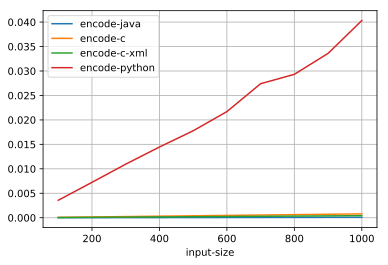

In [6]:
encoding[encoding['message'] == 'data-response'].sort_values(by='input-size').plot(
    x='input-size',
    y=['encode-java', 'encode-c', 'encode-c-xml', 'encode-python'],
    grid=True
)

# Decoding

In [7]:
d_c_xml = data["decode-c"][data["decode-c"]["format"] == 'XML'].sort_values(
    by='input-size'
).drop(['bytes', 'format'], axis=1
      ).rename(columns={'decode-c': 'decode-c-xml'})

d_py_c = pd.merge(data["decode-python"], data["decode-c"], how='inner').drop(['bytes', 'format'], axis=1)
d_py_c_xml = pd.merge(d_py_c, d_c_xml, on=['message', 'input-size'], how='inner')
decoding = pd.merge(d_py_c_xml, data["decode-java"], on=['message', 'input-size'],
                    how='inner').drop(['format', 'bytes'], axis=1)

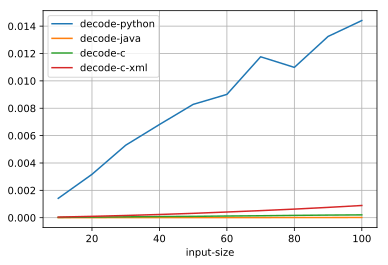

In [8]:
decoding[decoding['message'] == 'data-request'].sort_values(
    by='input-size'
).plot(
    x='input-size',
    y=['decode-python', 'decode-java', 'decode-c', 'decode-c-xml'],
    grid=True
)

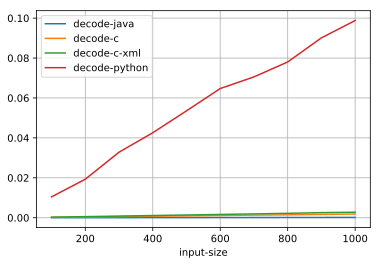

In [9]:
decoding[decoding['message'] == 'data-response'].sort_values(by='input-size').plot(
    x='input-size',
    y=['decode-java', 'decode-c', 'decode-c-xml', 'decode-python'],
    grid=True
)